# Subclustering of head ectoderm in Set 1

In [1]:
# loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/Set1/seu_HQC2_Set1.obj')
seu_HQC

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


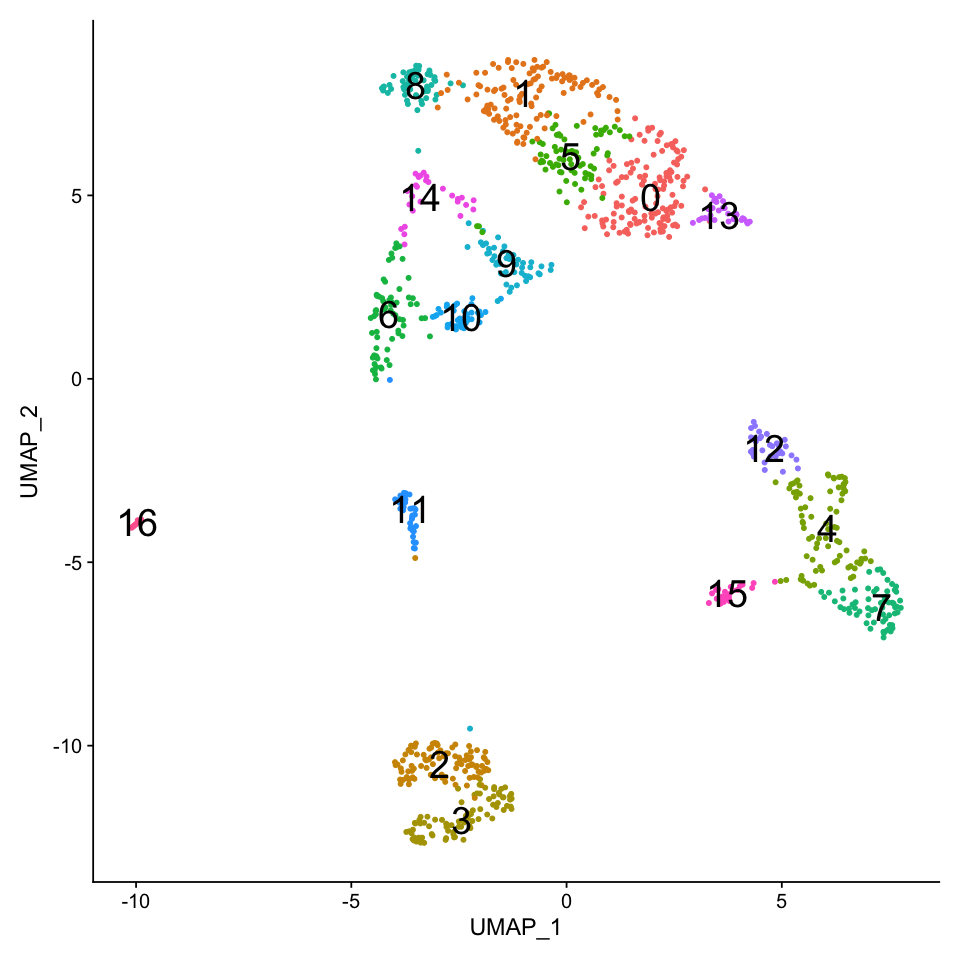

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

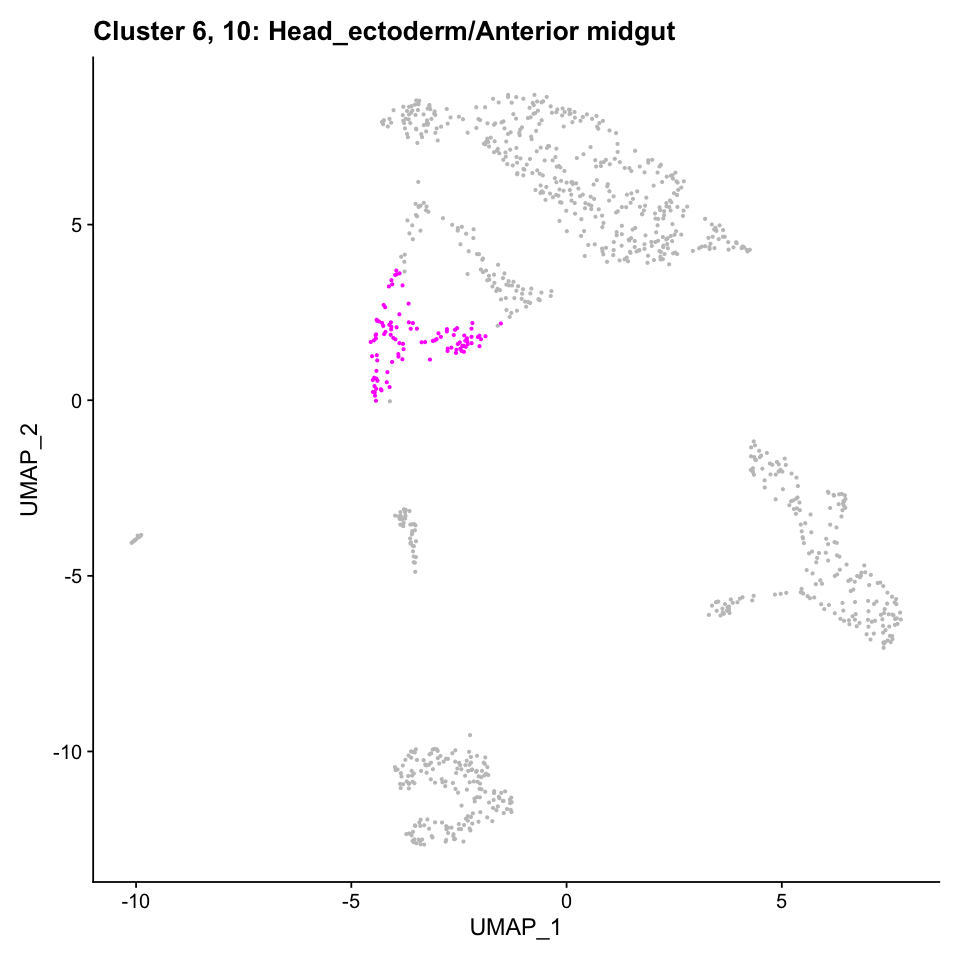

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(6,10))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Cluster 6, 10: Head_ectoderm/Anterior midgut')

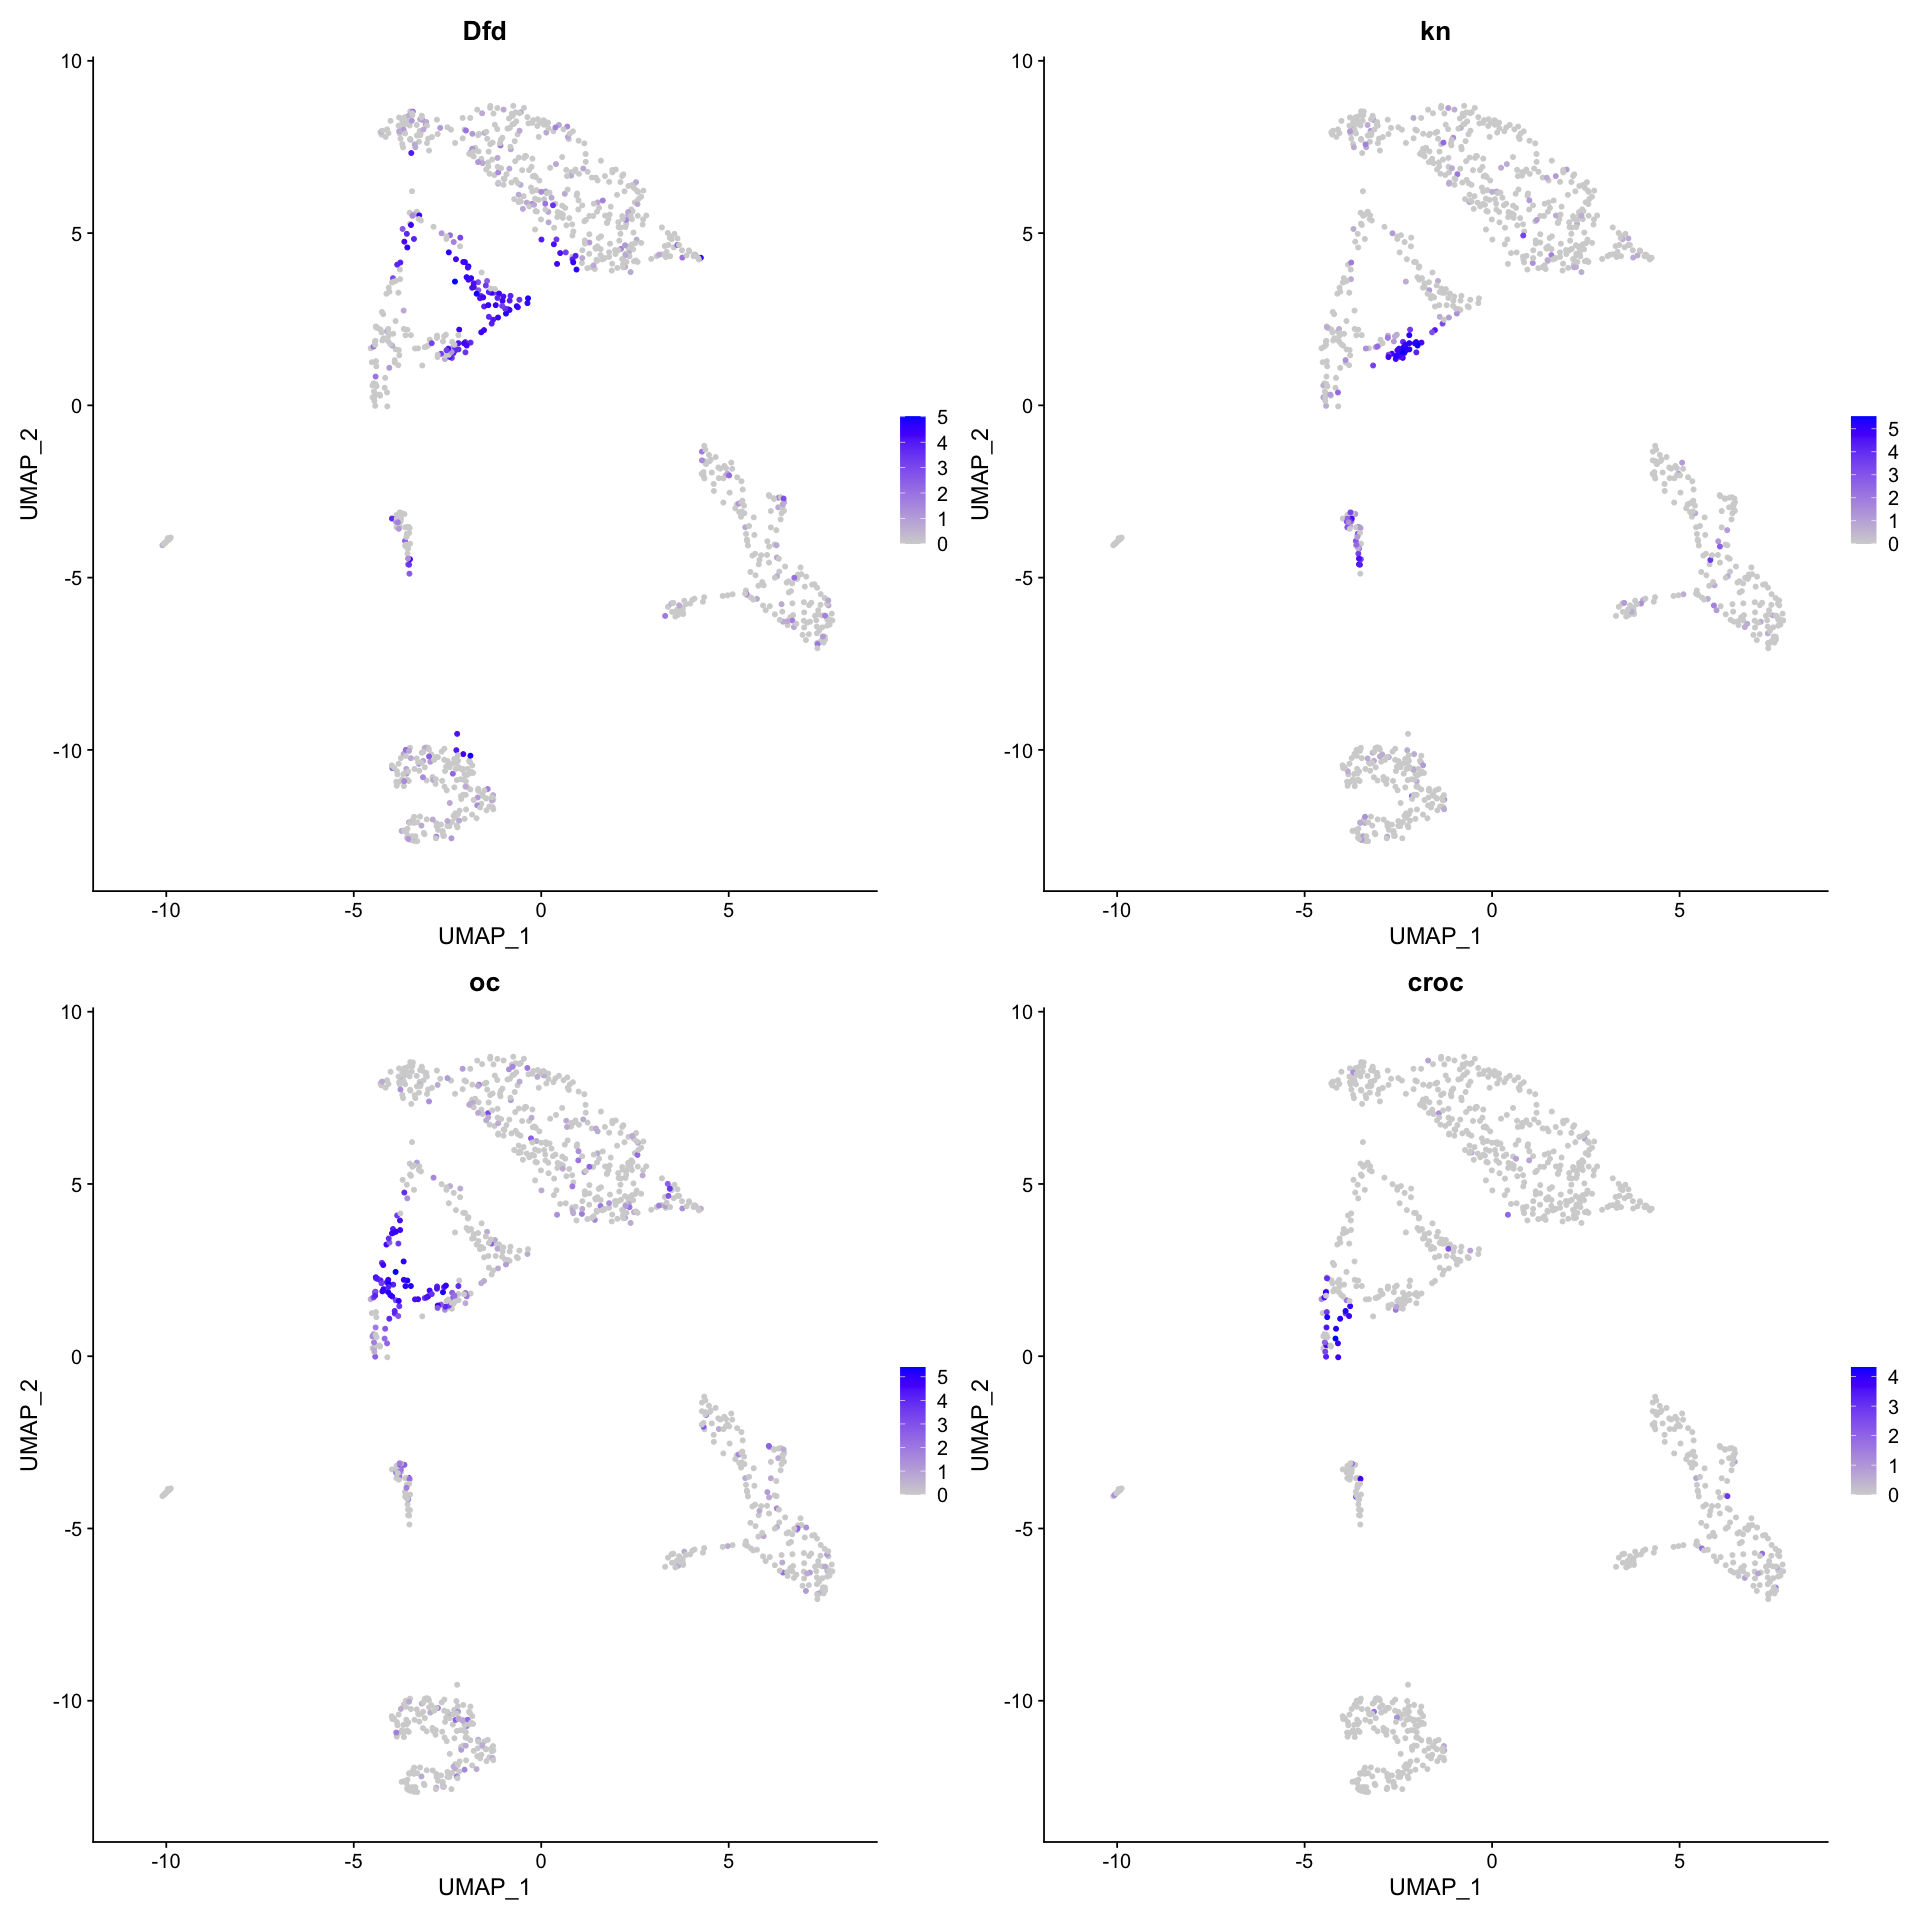

In [5]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, features = c('Dfd','kn','oc','croc'))

In [6]:
seu.head <- subset(seu_HQC, idents = c(6,10))
seu.head

An object of class Seurat 
28877 features across 103 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [7]:
seu.head$cluster.allcell <- seu.head$seurat_clusters

## Clustering
Num of cells < 500  
Skipping re-normalize

PC_ 1 
Positive:  tsh, lncRNA:CR43432, 28SrRNA-Psi:CR45862, Antp, Ama, E(spl)m7-HLH, Ubx, ImpL2, CG34224, sna 
	   zfh1, wntD, run, CG3036, CadN, opa, mid, Kr, Cys, rib 
	   hll, fend, twi, 28SrRNA-Psi:CR45859, E(spl)m8-HLH, salm, sprt, stumps, fog, CG32982 
Negative:  CG3502, oc, CG13427, Sec61beta, CG42342, cnc, CG7900, btd, Optix, knrl 
	   CG43085, ovo, CG4440, gt, CG14204, CG41128, CG5059, eya, rdx, PGRP-SC2 
	   tinc, RpL41, fj, UQCR-Q, kni, smt3, Hsp83, Blimp-1, kn, lncRNA:CR34335 
PC_ 2 
Positive:  fkh, mirr, ImpE2, CG3502, Mdr49, ltl, rib, Myc, Ndae1, Hsp83 
	   Optix, edl, hkb, Tis11, Sec61beta, Ldh, Adgf-A, croc, ab, bab2 
	   Tl, VepD, CG14427, CG7029, stumps, Pka-C3, 28SrRNA-Psi:CR40741, CG42342, so, Dscam2 
Negative:  hth, SoxN, kn, ovo, Blimp-1, btd, CG15628, Tollo, ems, path 
	   dpn, D, sog, stg, CG5059, E(spl)malpha-BFM, Dl, Ptr, Con, 28SrRNA-Psi:CR45859 
	   28SrRNA-Psi:CR45862, gt, Atx-1, Tom, trn, Meltrin, Dfd, dan, nuf, Pvf3 
PC_ 3 
Positive:  knrl, kni, hth, kn, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 103
Number of edges: 3624

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3863
Number of communities: 3
Elapsed time: 0 seconds


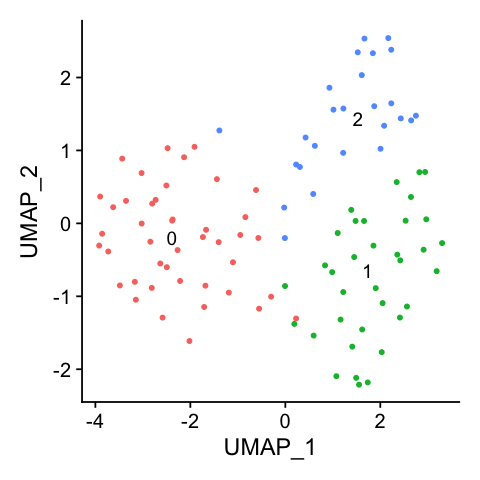

In [8]:
options(repr.plot.width=4, repr.plot.height=4)
seu.head <- RunPCA(seu.head)
seu.head <- RunUMAP(seu.head, dims = 1:30)
seu.head <- FindNeighbors(seu.head, dims = 1:30)
seu.head <- FindClusters(seu.head)
DimPlot(seu.head, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 103
Number of edges: 3624

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1205
Number of communities: 9
Elapsed time: 0 seconds


2 singletons identified. 7 final clusters.



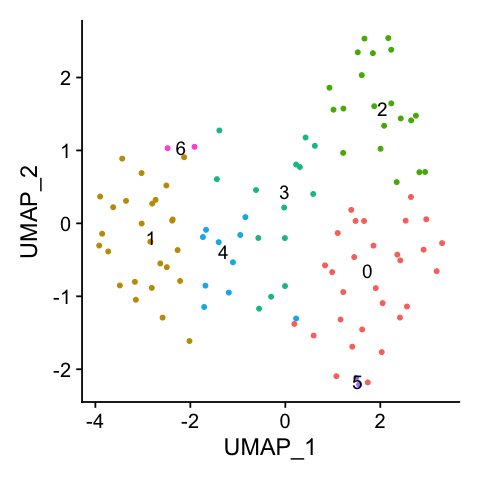

In [9]:
seu.head <- FindClusters(seu.head, resolution = 1.7)
options(repr.plot.width=4, repr.plot.height=4)
DimPlot(seu.head, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 103
Number of edges: 3624

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1643
Number of communities: 6
Elapsed time: 0 seconds


1 singletons identified. 5 final clusters.



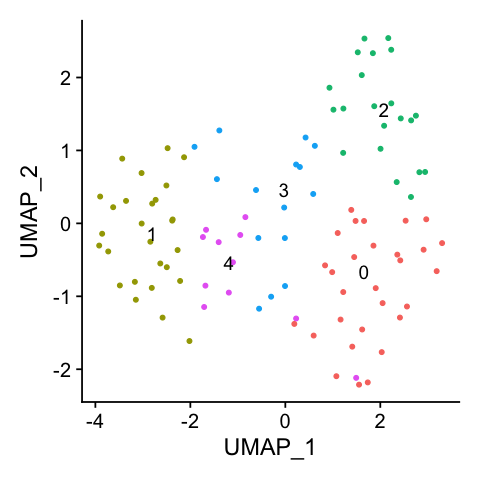

In [10]:
seu.head <- FindClusters(seu.head, resolution = 1.5)
options(repr.plot.width=4, repr.plot.height=4)
DimPlot(seu.head, reduction = 'umap', label = T) + NoLegend()

In [11]:
levels(seu.head) <- c(2,0,3,4,1)
all.markers.head <- FindAllMarkers(object = seu.head, only.pos = TRUE)
nrow(seu.head)
all.markers.head.top10 <- all.markers.head %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.head.top10)

Calculating cluster 2

Calculating cluster 0

Calculating cluster 3

Calculating cluster 4

Calculating cluster 1



[1] 11281

[1] 50

Warning message in DoHeatmap(seu.head, features = c("oc", "kn", "twi", "hkb", "croc", :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG12708, insc, CG15646”


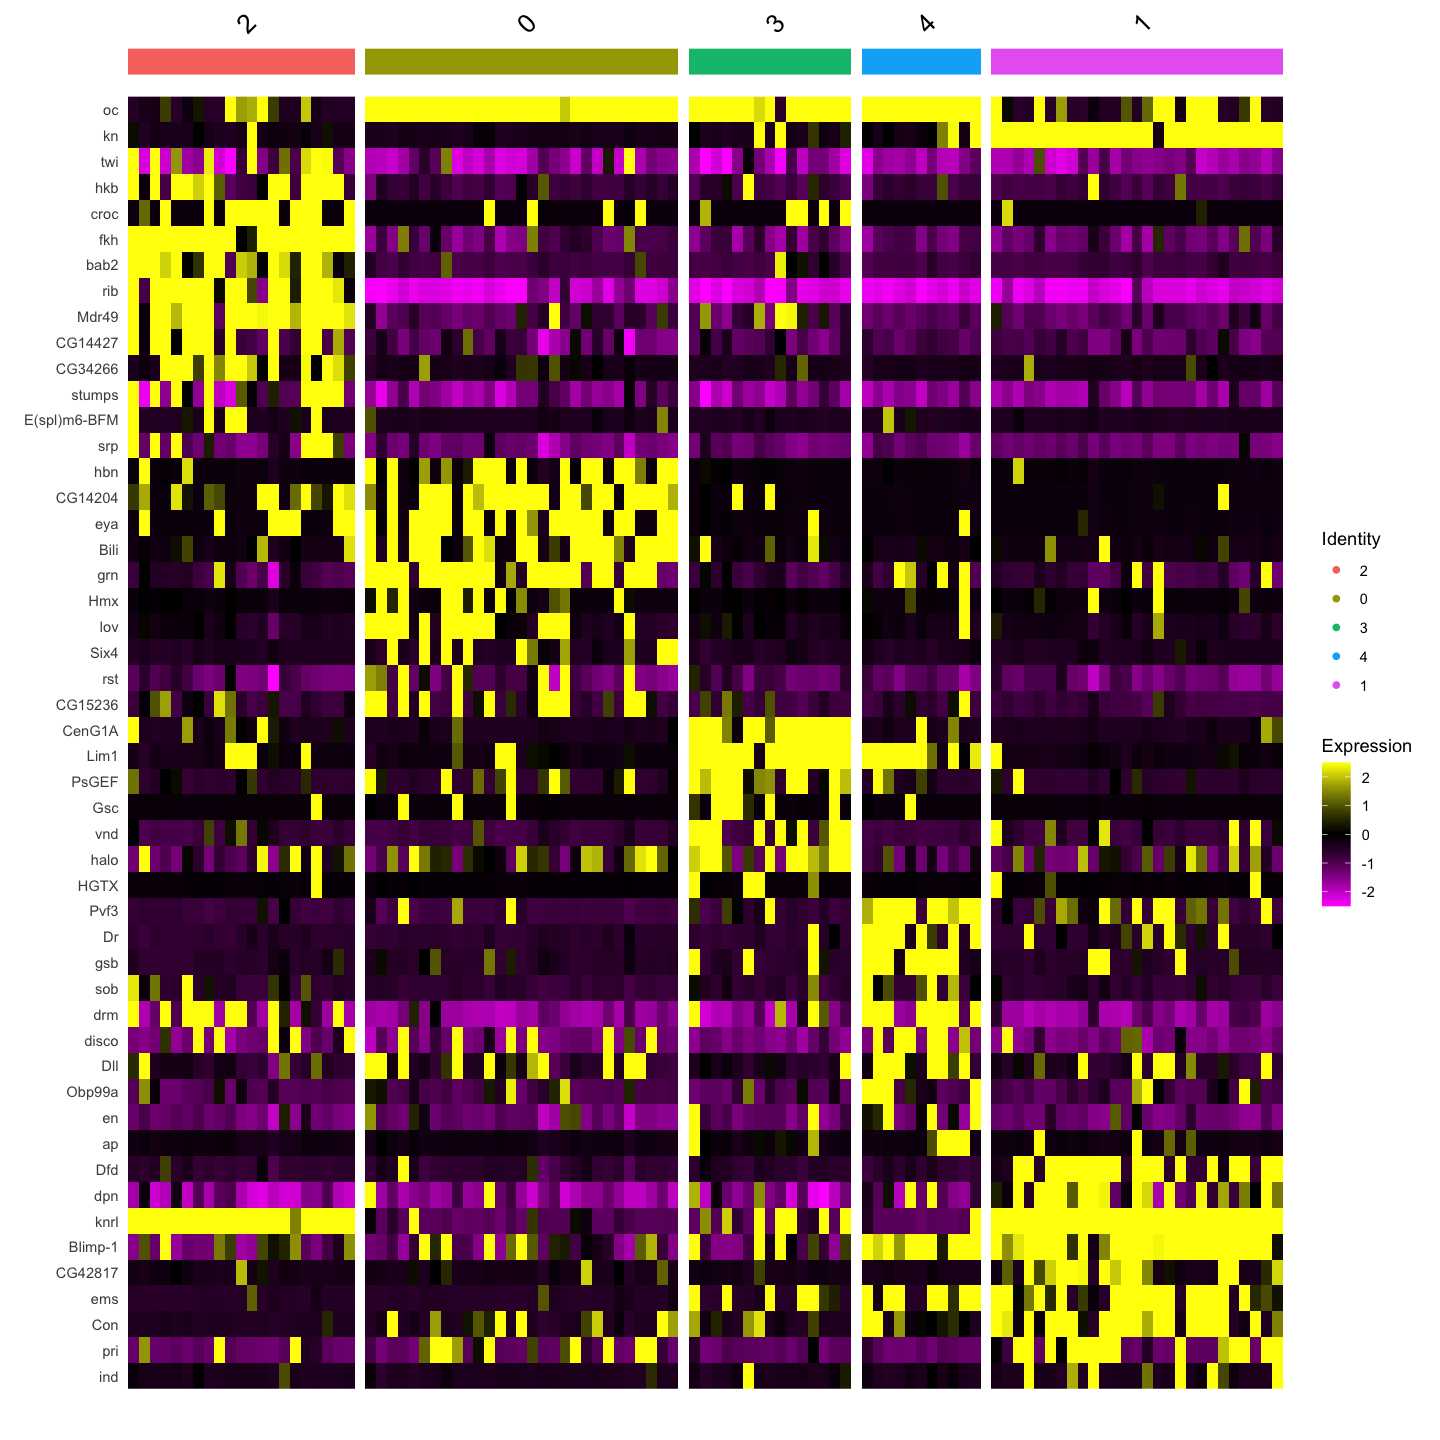

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.head, features = c("oc","kn",'twi','hkb','croc',all.markers.head.top10$gene))

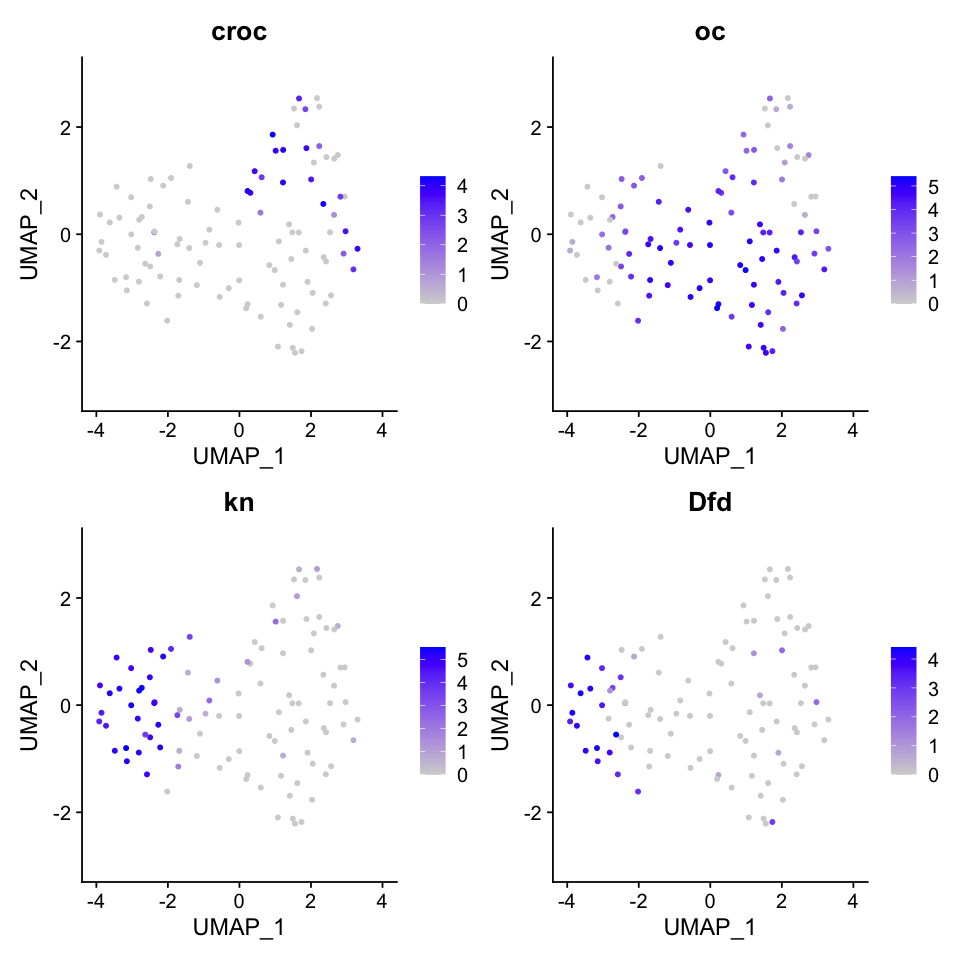

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.head, reduction = "umap", features = c("croc","oc", "kn", "Dfd"), pt.size = 1,  ncol = 2)

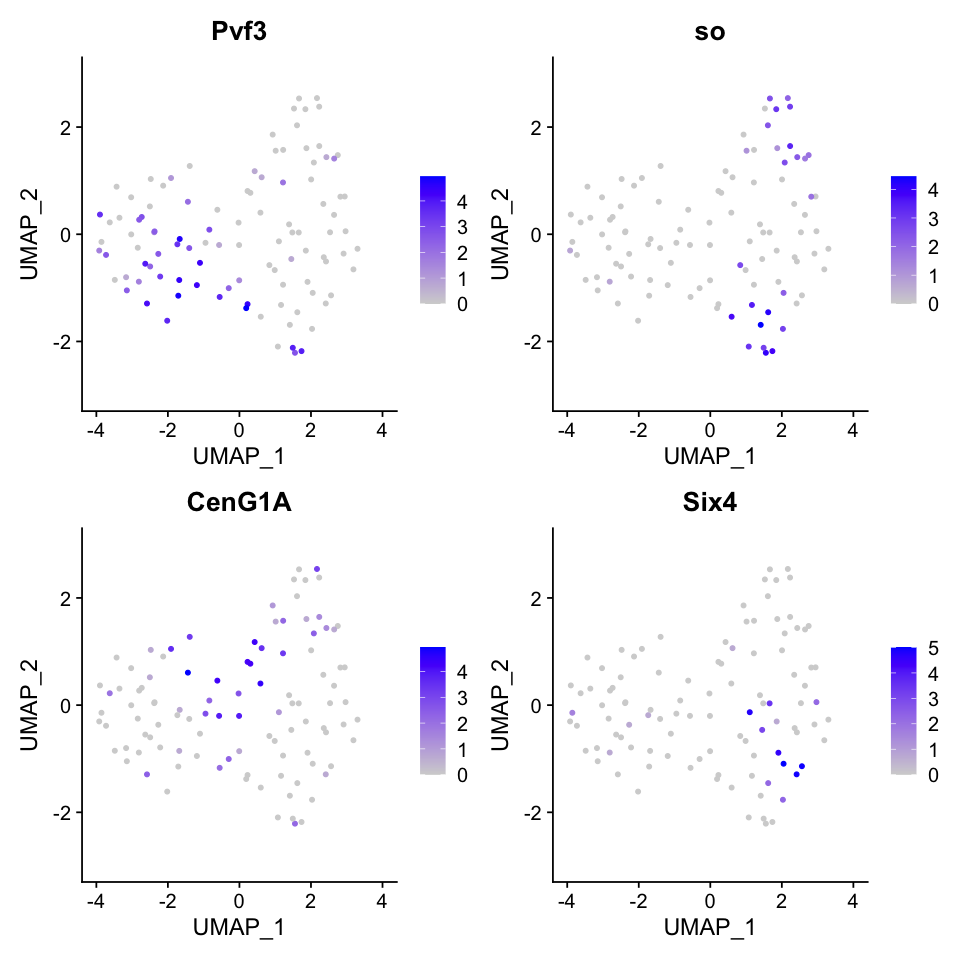

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.head, reduction = "umap", features = c("Pvf3", "so", "CenG1A", "Six4"), pt.size = 1,  ncol = 2)

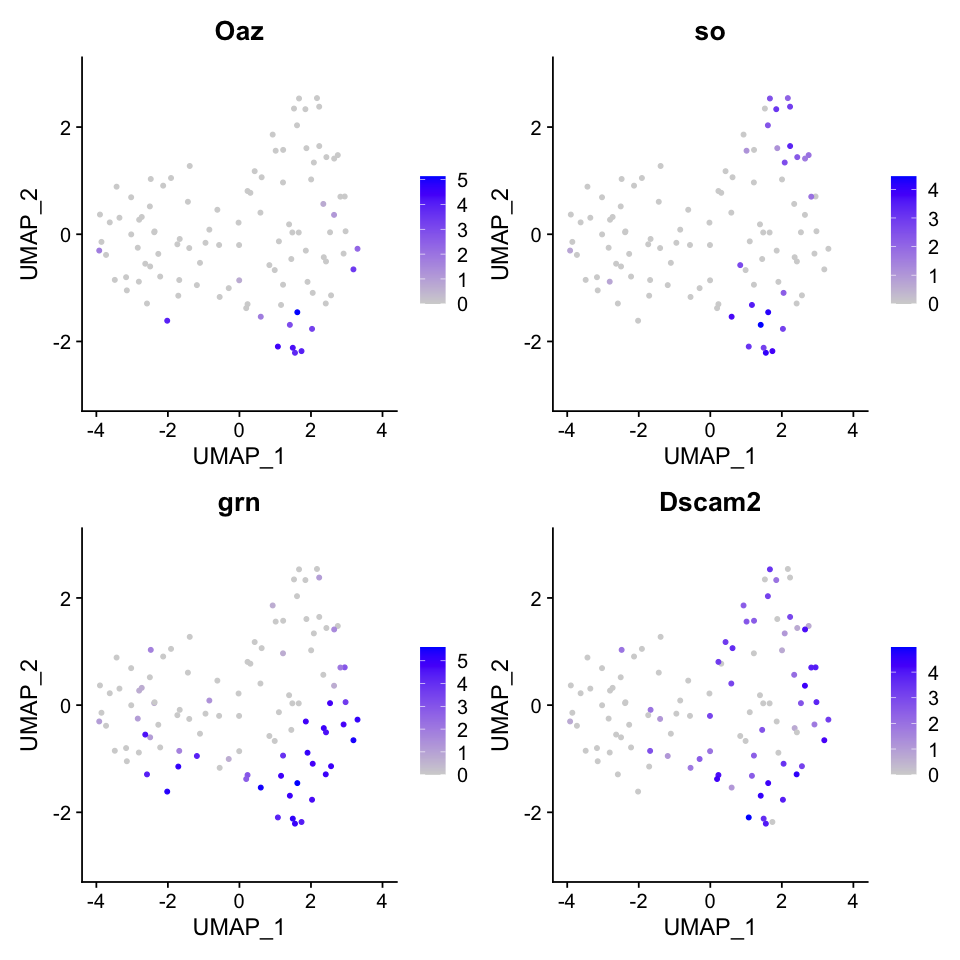

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.head, reduction = "umap", features = c("Oaz", "so", "grn", "Dscam2"), pt.size = 1,  ncol = 2)

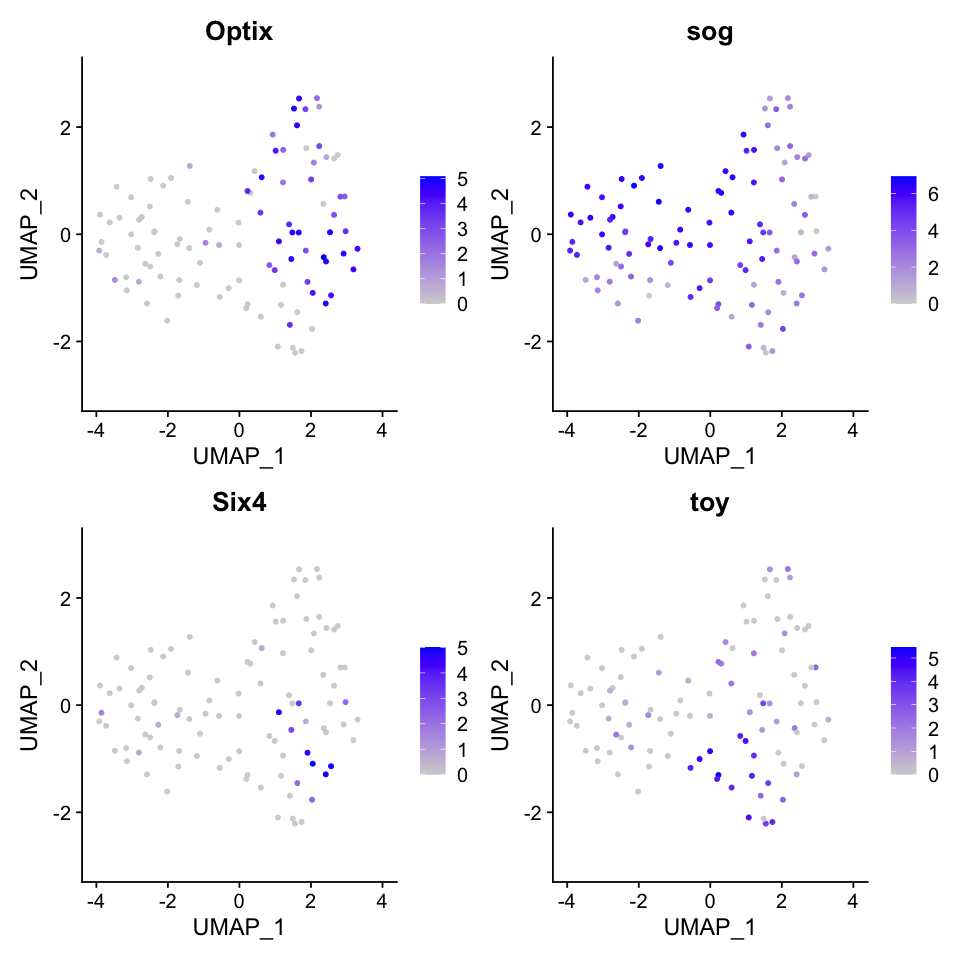

In [16]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.head, reduction = "umap", features = c("Optix", "sog", "Six4", "toy"), pt.size = 1,  ncol = 2)

## Try to separate head_kn and PS0
cluster 1 includes both region, head_kn(Dfd-) and PS0(Dfd+)

In [17]:
seu.head.c1 <- subset(seu.head, idents = 1)
seu.head.c1

An object of class Seurat 
28877 features across 27 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
PC_ 1 
Positive:  tsh, rib, lncRNA:CR43432, CG3036, Ama, Antp, Myc, CG34224, edl, Kr 
	   Ubx, fend, sna, salm, run, wntD, toc, twi, CadN, zfh1 
	   drm, ImpL2, sprt, Traf4, Nplp2, stumps, hll, Cyp310a1, Tis11, E(spl)m7-HLH 
Negative:  kn, knrl, gt, cnc, Blimp-1, ovo, path, kni, trn, btd 
	   CG13427, SoxN, Dfd, Con, ems, nuf, CG15628, Tollo, h, hth 
	   sog, bowl, CG4440, stg, retn, D, CG5059, pri, Invadolysin, drl 
PC_ 2 
Positive:  ems, btd, ovo, Atx-1, lab, oc, upd1, cv-2, drl, Dll 
	   fj, Egfr, Con, Blimp-1, CG43394, Tollo, stg, aop, grn, fz2 
	   tinc, odd, tld, CG11498, hth, ptc, dpp, Pvf3, trn, gcm 
Negative:  slp2, pri, D, sog, wg, pxb, slp1, ths, Dfd, smal 
	   gsb, SoxN, ind, cnc, vn, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27
Number of edges: 351

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2000
Number of communities: 1
Elapsed time: 0 seconds


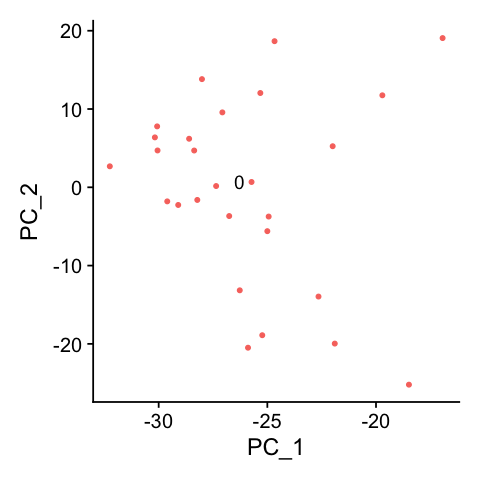

In [18]:
options(repr.plot.width=4, repr.plot.height=4)
seu.head.c1 <- RunPCA(seu.head.c1, npcs = 26)
seu.head.c1 <- FindNeighbors(seu.head.c1, dims = 1:26)
seu.head.c1 <- FindClusters(seu.head.c1)
DimPlot(seu.head.c1, reduction = 'pca', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27
Number of edges: 351

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0093
Number of communities: 2
Elapsed time: 0 seconds


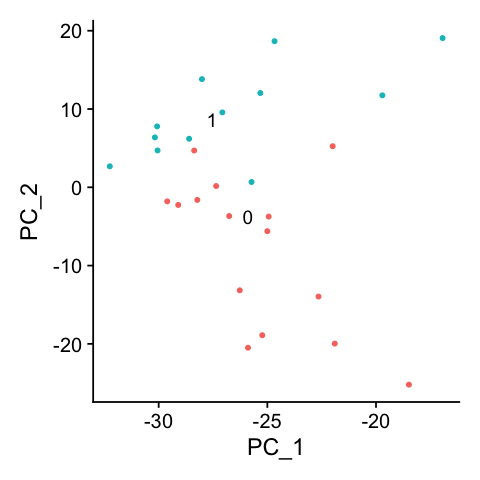

In [19]:
options(repr.plot.width=4, repr.plot.height=4)
seu.head.c1 <- FindClusters(seu.head.c1, resolution = 1.0)
DimPlot(seu.head.c1, reduction = 'pca', label = T) + NoLegend()

In [20]:
all.markers.head <- FindAllMarkers(object = seu.head.c1, only.pos = TRUE)
nrow(seu.head)
all.markers.head.top10 <- all.markers.head %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.head.top10)

Calculating cluster 0

Calculating cluster 1



[1] 11281

[1] 20

Warning message in DoHeatmap(seu.head.c1, features = c("Dfd", "kn", all.markers.head.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG31988, CG6406, CG7148, CG8366, betaCOP”


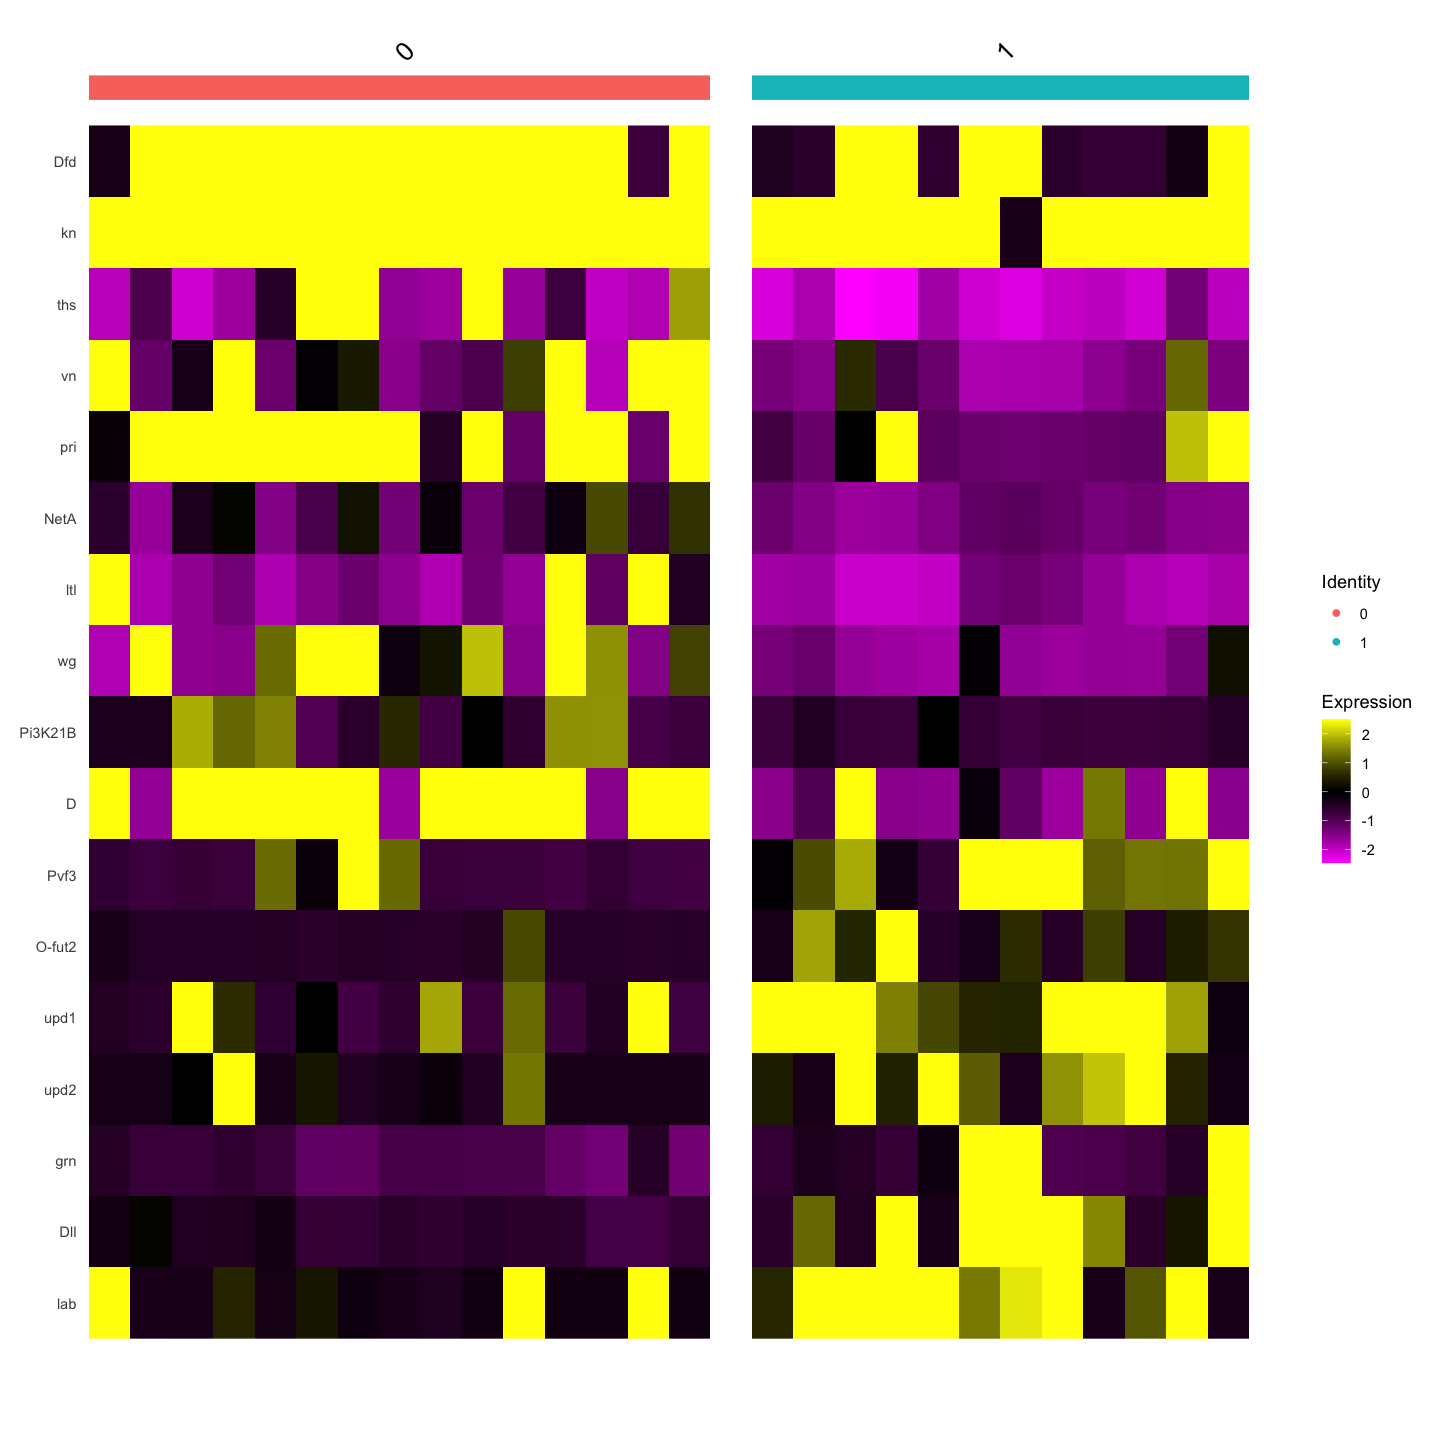

In [21]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.head.c1, features = c("Dfd","kn",all.markers.head.top10$gene))

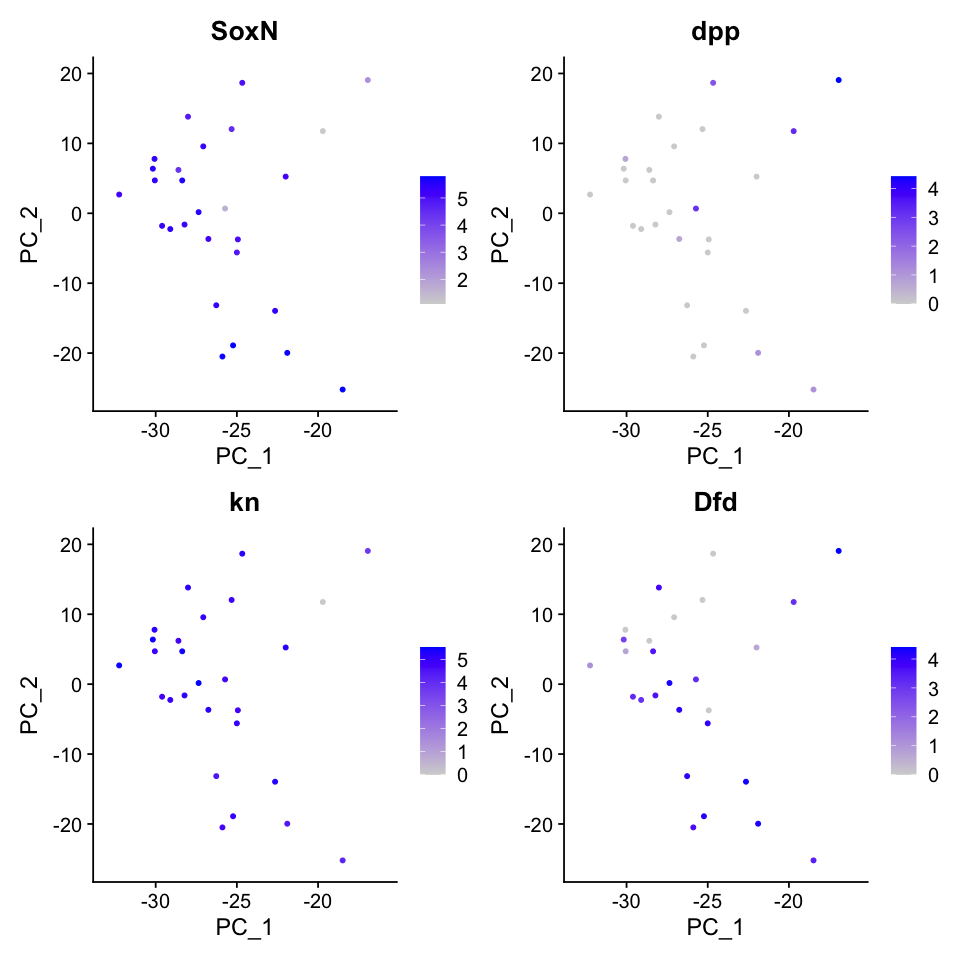

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.head.c1, reduction = "pca", features = c("SoxN","dpp", "kn", "Dfd"), pt.size = 1,  ncol = 2)

Both include Dfd+ cells   
Separation fails

## Add annotation

In [23]:
manual_id <- as.data.frame(seu.head$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "0" = "ectoderm_head_oc_grn", 
                                "1" = "ectoderm_head_kn",
                                "2" = "endoderm_antMG_and_ectoderm_head_croc", #including hkb+
                                "3" = "ectoderm_head_oc_CenG1A", 
                                "4" = "ectoderm_head_oc_Pvf3"
                                )

head(manual_id)

,manual_ID
,<fct>
batch1_col7GAGCTA,0
batch1_col10TGTACG,2
batch1_col11CACGTA,2
batch1_col13AGCACT,2
batch1_col14GCATCT,4
batch1_col14TGCATC,2


,manual_ID
,<fct>
batch1_col7GAGCTA,ectoderm_head_oc_grn
batch1_col10TGTACG,endoderm_antMG_and_ectoderm_head_croc
batch1_col11CACGTA,endoderm_antMG_and_ectoderm_head_croc
batch1_col13AGCACT,endoderm_antMG_and_ectoderm_head_croc
batch1_col14GCATCT,ectoderm_head_oc_Pvf3
batch1_col14TGCATC,endoderm_antMG_and_ectoderm_head_croc


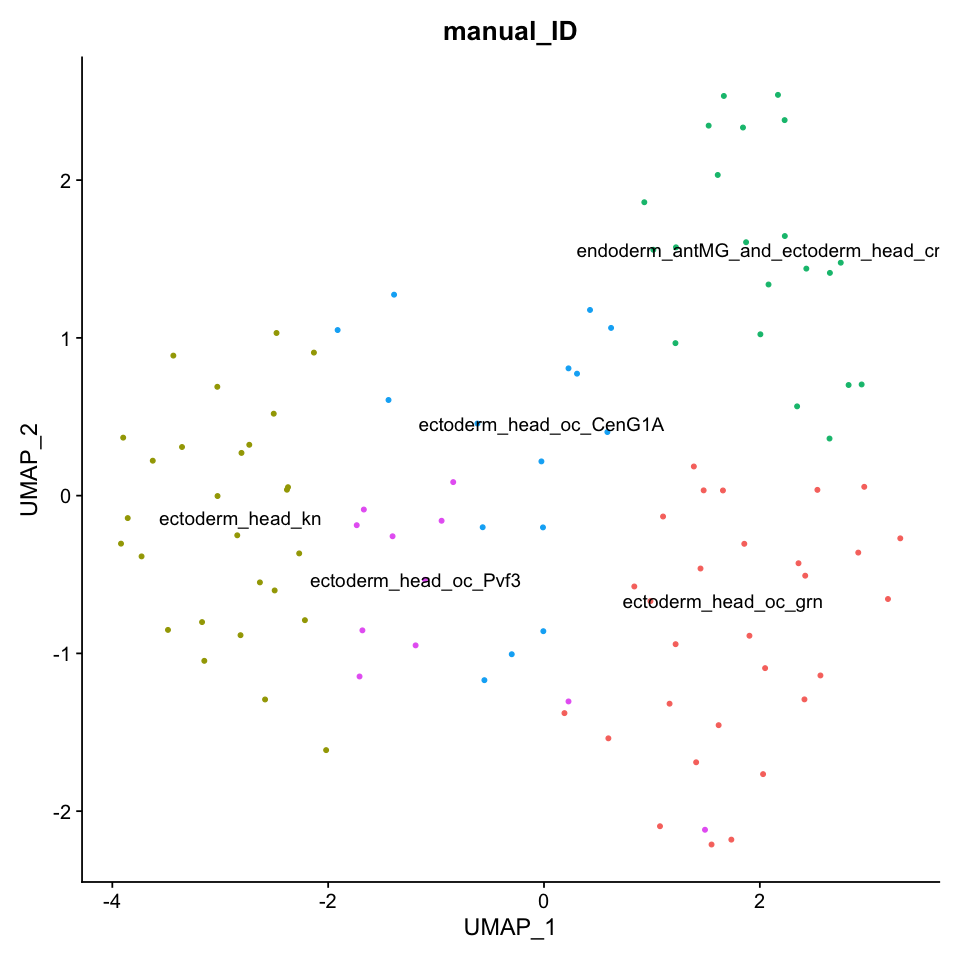

In [24]:
seu.head$manual_ID <- manual_id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.head, reduction = 'umap', label = TRUE, group.by='manual_ID') + NoLegend()

In [25]:
Idents(seu.head) <- seu.head$manual_ID
levels(seu.head) <- c('ectoderm_head_kn','ectoderm_head_oc_Pvf3',
                    'ectoderm_head_oc_CenG1A', 'ectoderm_head_oc_grn','endoderm_antMG_and_ectoderm_head_croc')
all.markers.head <- FindAllMarkers(object = seu.head, only.pos = TRUE)
nrow(all.markers.head)
all.markers.head.top10 <- all.markers.head %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.head.top10)

Calculating cluster ectoderm_head_kn

Calculating cluster ectoderm_head_oc_Pvf3

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_oc_grn

Calculating cluster endoderm_antMG_and_ectoderm_head_croc



[1] 780

[1] 50

Warning message in DoHeatmap(seu.head, features = c(all.markers.head.top10$gene, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG12708, insc, CG15646”


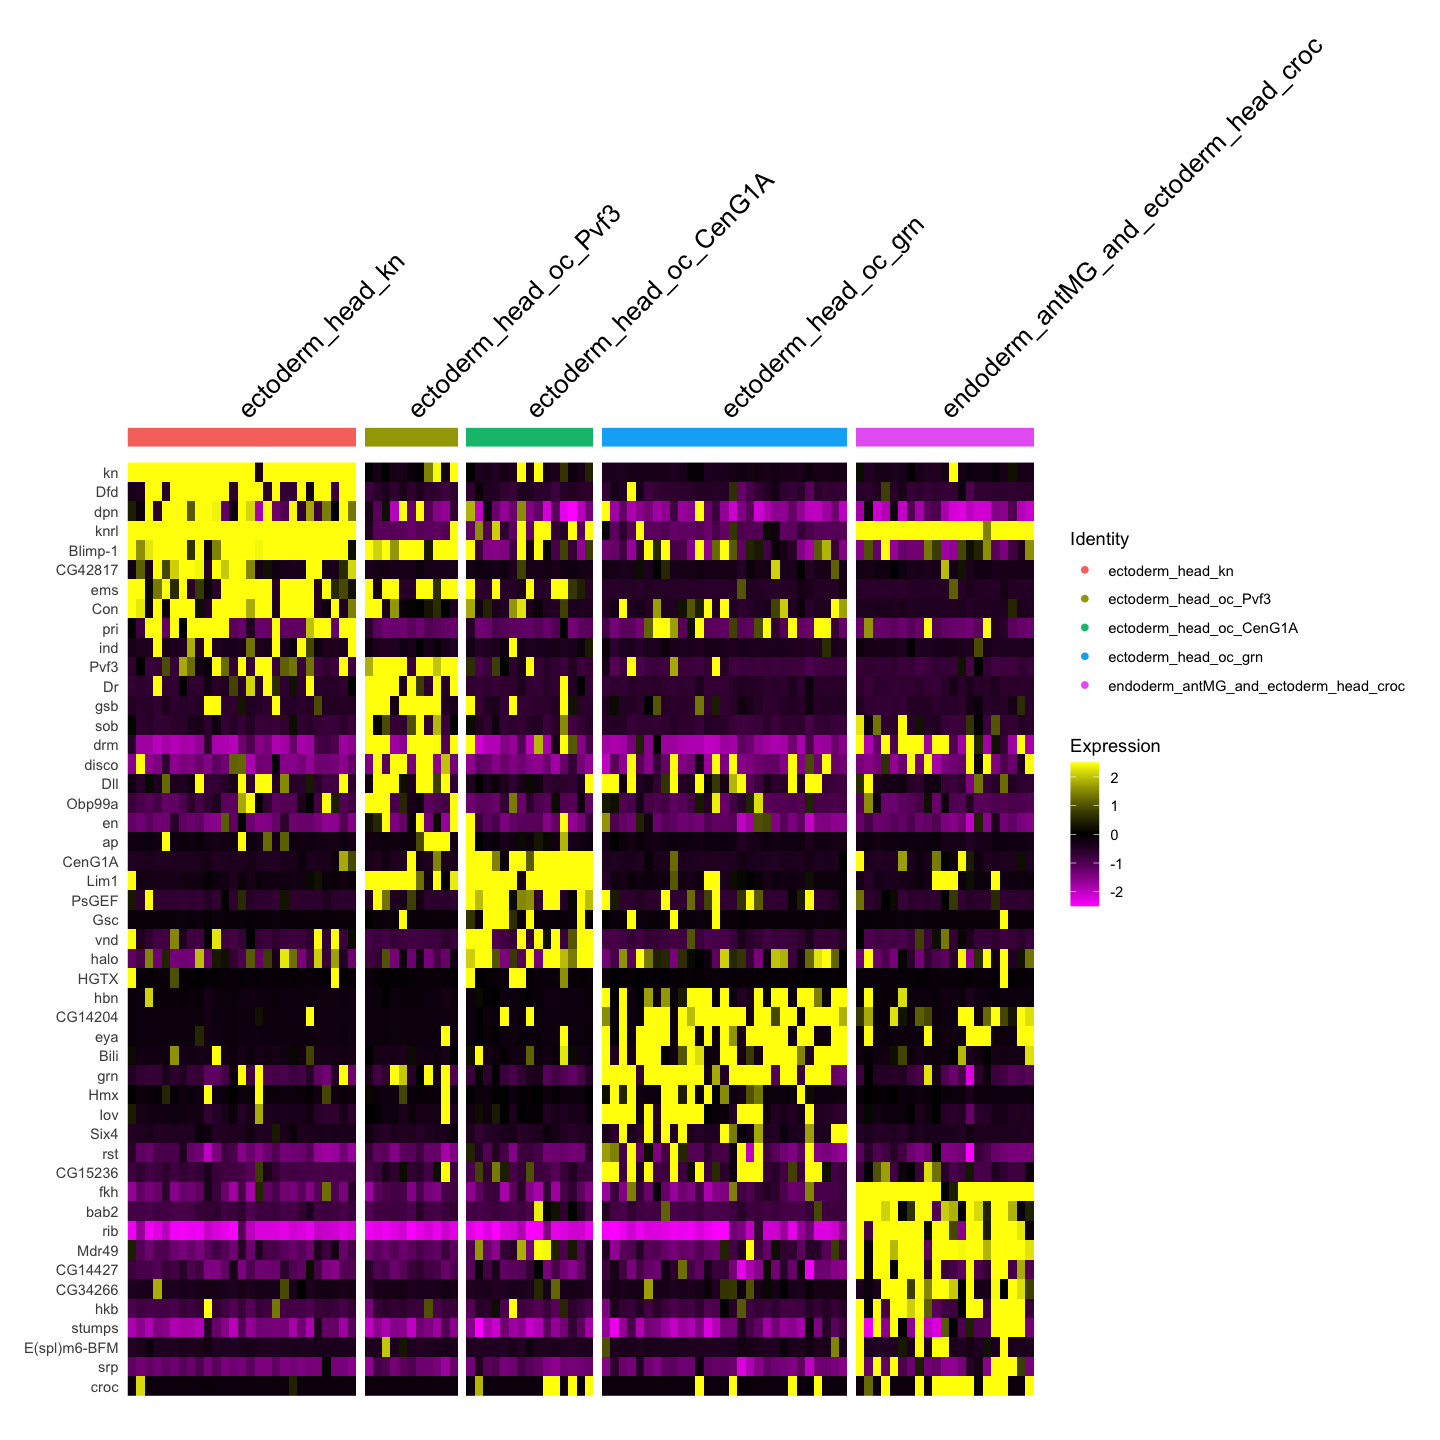

In [26]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.head, features = c(all.markers.head.top10$gene,'croc'))

Saving 7 x 7 in image



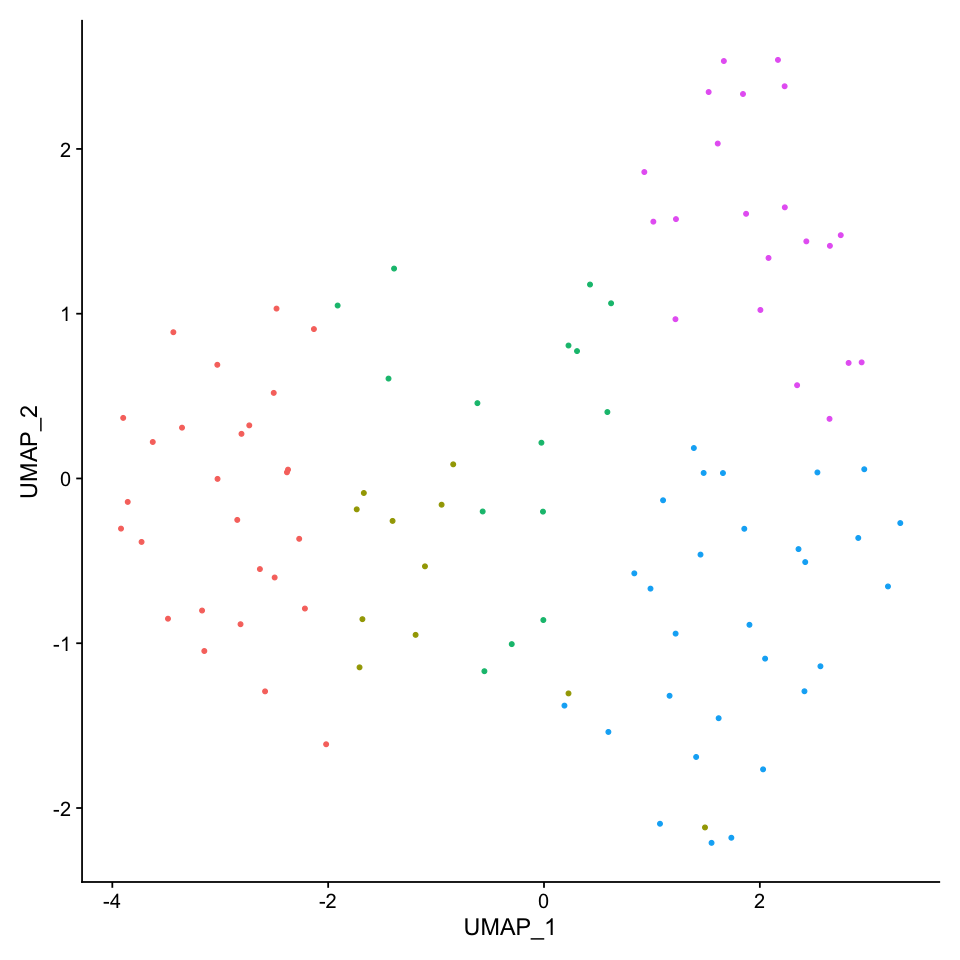

In [27]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.head, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/03_head_subclustering_Set1/head_umap1.eps", dpi = 300)

Saving 7 x 7 in image



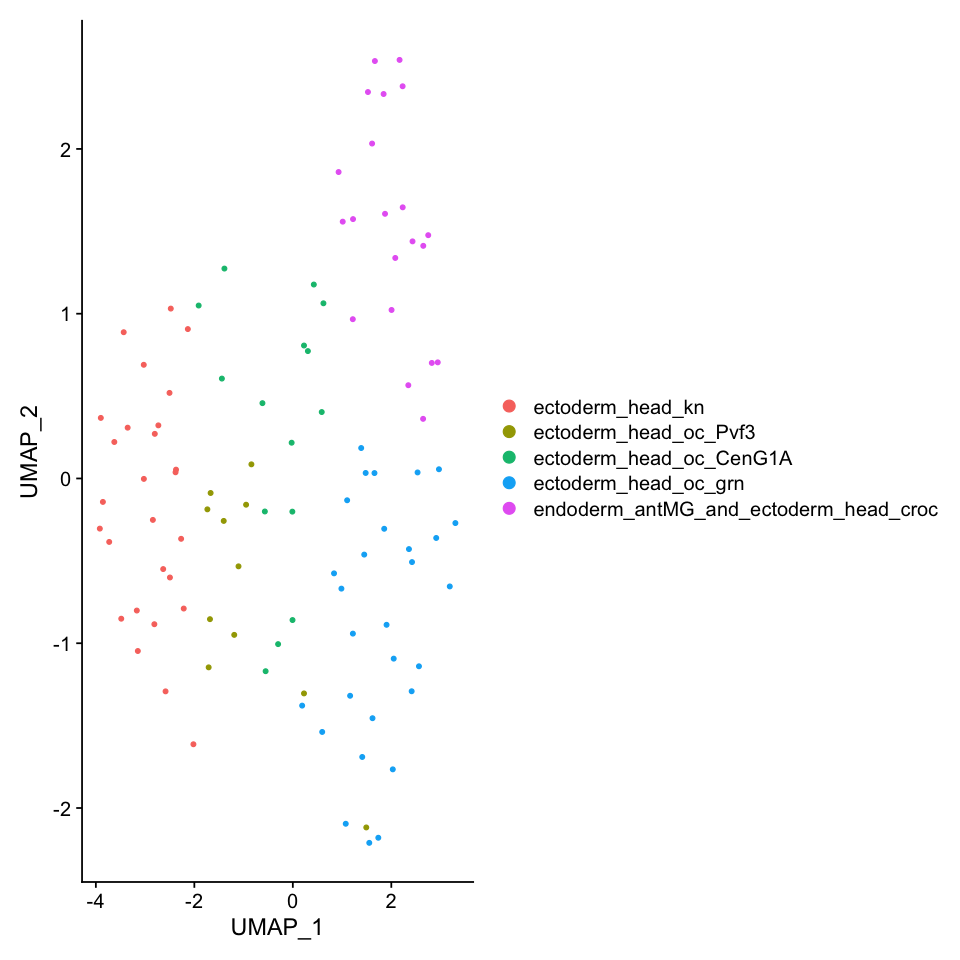

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.head, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/03_head_subclustering_Set1/head_umap2.eps", dpi = 300)

Warning message in DoHeatmap(seu.head, features = c(all.markers.head.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG12708, insc, CG15646”


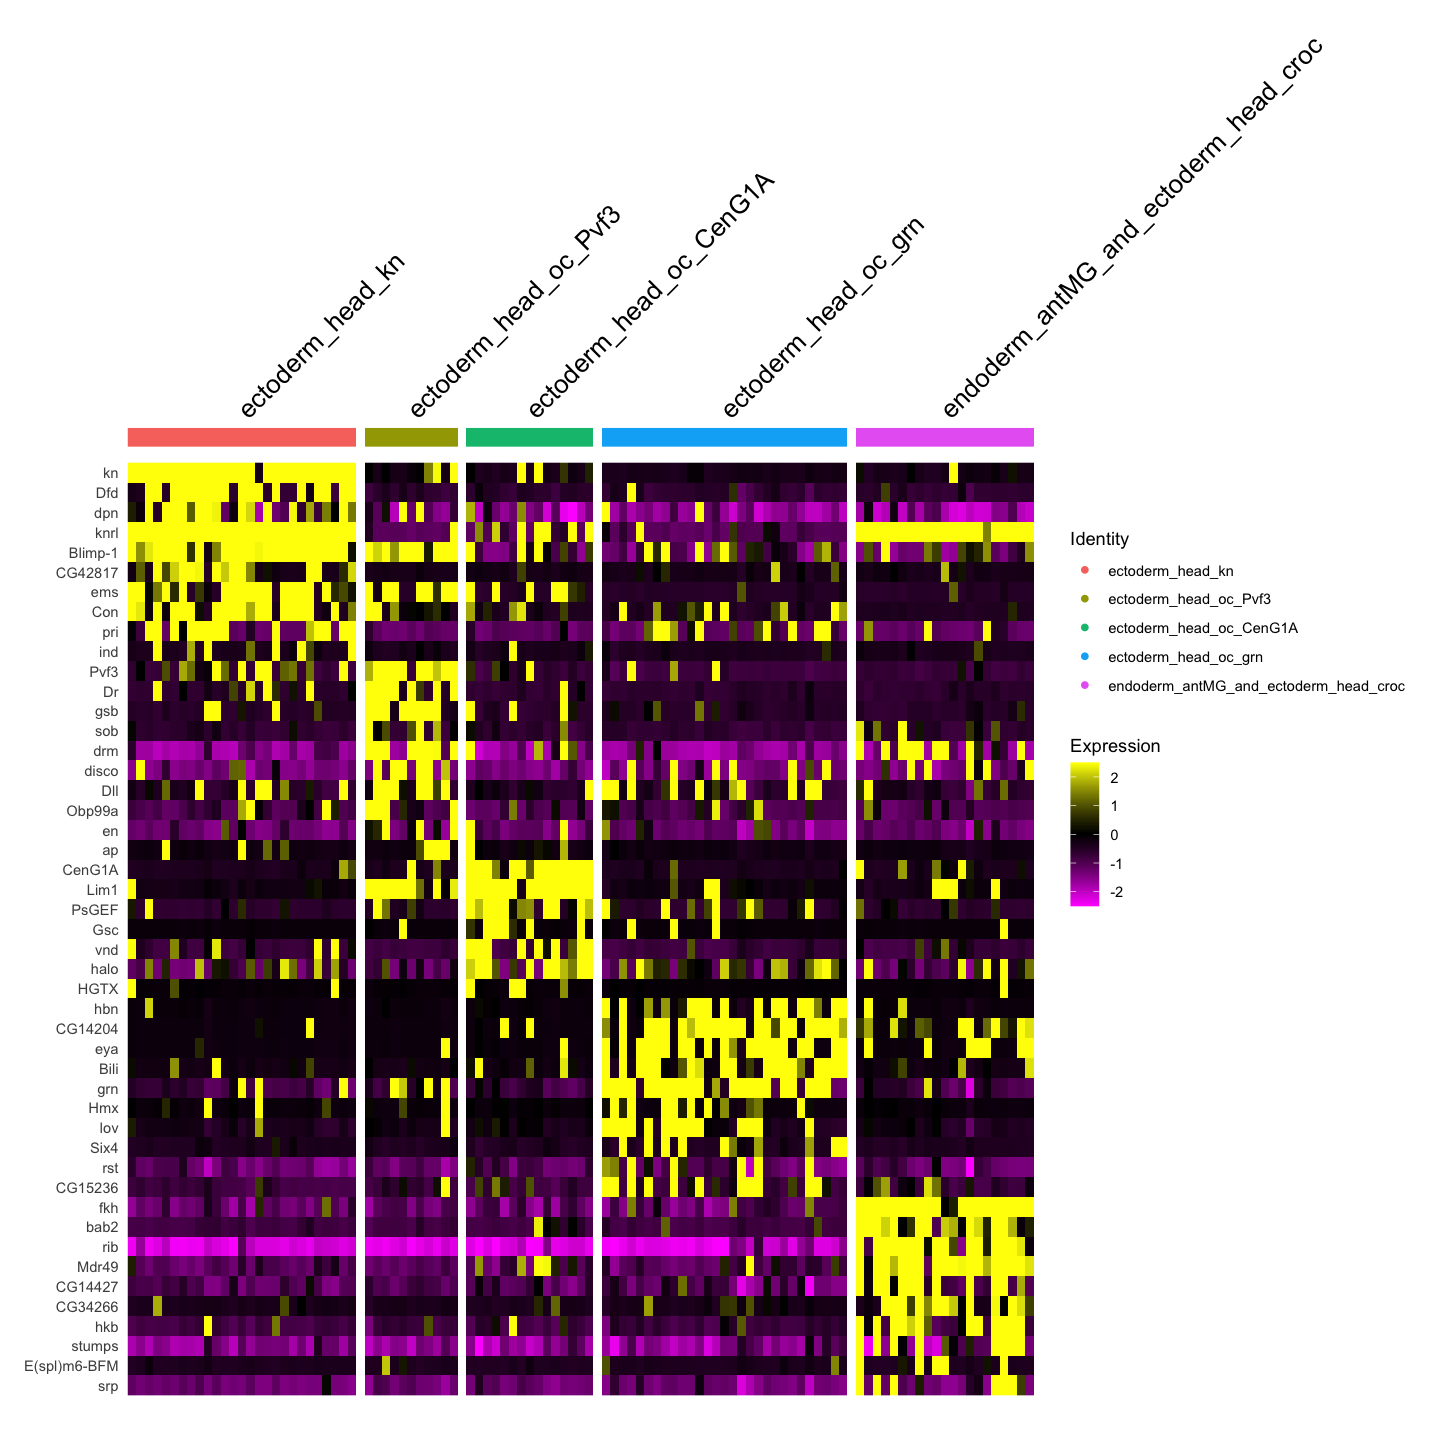

In [29]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.head, features = c(all.markers.head.top10$gene))
fig
ggsave(fig, file = "./figures/03_head_subclustering_Set1/head_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [30]:
seu.wo.head <- subset(seu_HQC, idents = c(6, 10), invert = TRUE)
seu.wo.head

An object of class Seurat 
28877 features across 915 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [31]:
seu.wo.head$manual_ID = 'others'
seu.merged <- merge(seu.head, seu.wo.head)
seu_HQC$manual_ID <- seu.merged$manual_ID

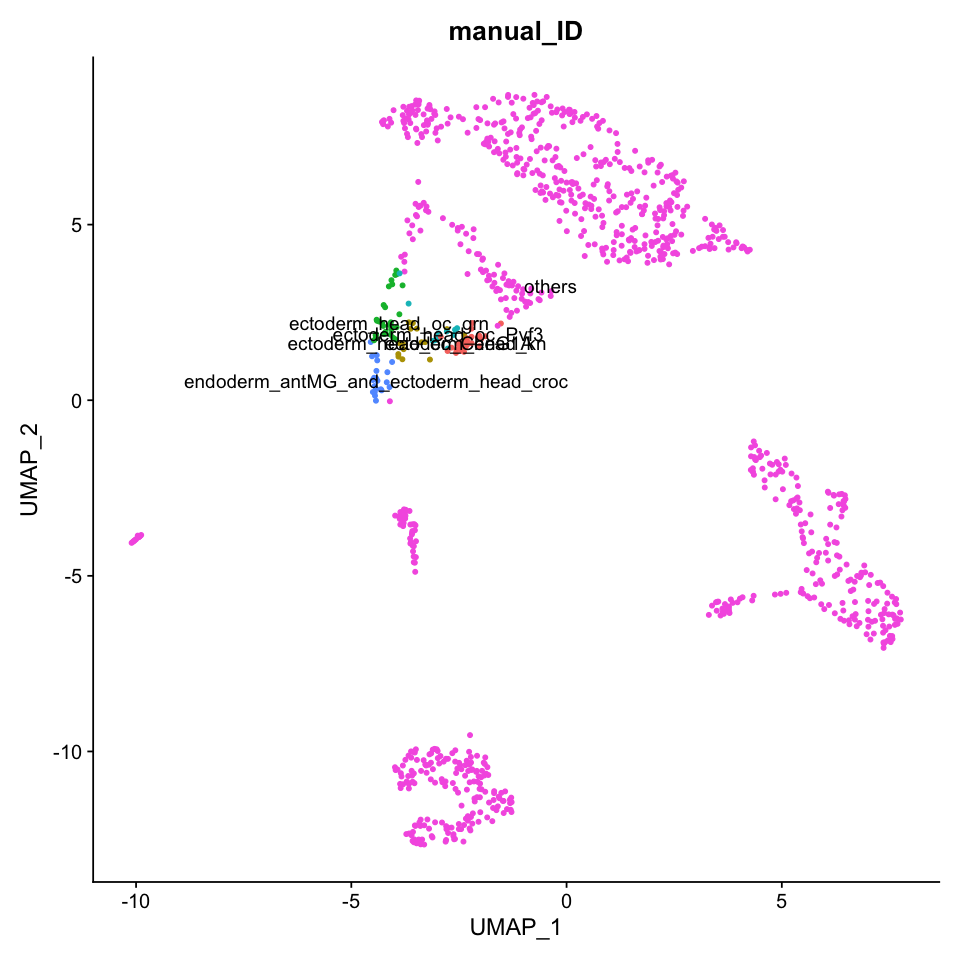

In [32]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, group.by='manual_ID') + NoLegend()

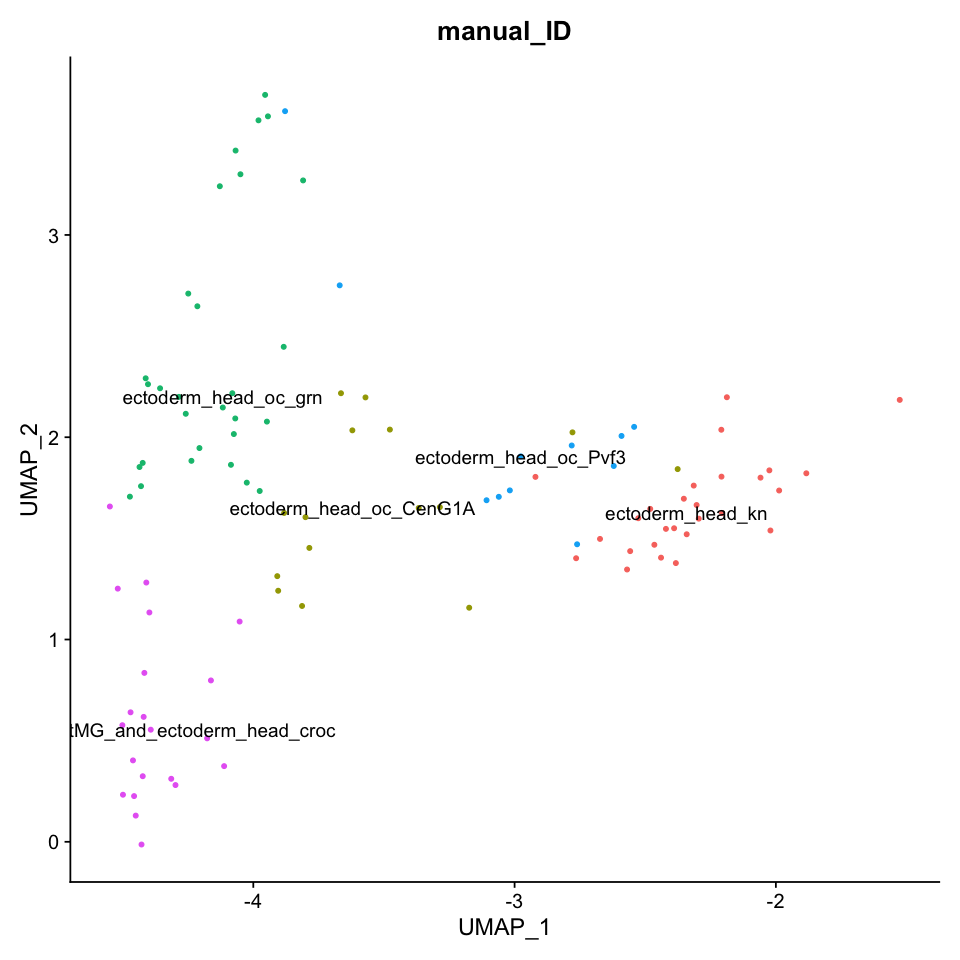

In [33]:
Idents(seu_HQC) <- seu_HQC$manual_ID
seu.plot <- subset(seu_HQC, ident = 'others', invert = TRUE)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.plot, reduction = 'umap', label = TRUE, group.by='manual_ID') + NoLegend()

In [34]:
saveRDS(object = seu.head, file = '../../data/seurat_object/Set1/subclustering/seu_head_subclustered.obj')

In [35]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv